<a href="https://colab.research.google.com/github/Avanymanoj7/html-capstoneprojectone/blob/main/infosys_firstfriday13feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import os

def generate_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')

    # Create synthetic data
    df = pd.DataFrame(date_rng, columns=['timestamp'])

    # Simulate device power consumption (Watts)
    # Fridge: Cyclic pattern (on/off) + base load
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])

    # AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    ac_prob = np.where(month >= 4, 0.8, 0.1) # higher probability in summer months
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)

    # Lights: higher at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)

    # Other appliances
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.9, 0.1])

    # Total power
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']

    data_path = os.path.join("energy_consumption_project", "data", "raw", "energy_data.csv")
    # Create parent directories if they don't exist
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
    df.to_csv(data_path, index=False)
    print(f"Data saved to {data_path}")

if __name__ == "__main__":
    generate_data()


Generating synthetic energy data...
Data saved to energy_consumption_project/data/raw/energy_data.csv


/tmp/ipython-input-2216106194.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


In [6]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# You need to provide a valid file name from the dataset.
# For example, let's assume there's a file called 'Daily_Values.csv'
file_path = "Daily_Values.csv"  # <--- FIX: Replace with the actual file name from the dataset

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "taranvee/smart-home-dataset-with-weather-information",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-327072960.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information/versions/1
The server reported the following issues: Data not found
Please make sure you specified the correct resource identifiers.

In [11]:
import pandas as pd
import os

# Construct the path to the generated CSV file
data_path = os.path.join("energy_consumption_project", "data", "raw", "energy_data.csv")

# Load the CSV file into a DataFrame
df_energy = pd.read_csv(data_path)

# Display the first 5 rows of the DataFrame
print("First 10 rows of the loaded energy data:")
display(df_energy.head())

First 10 rows of the loaded energy data:


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,0,2427,85,0,2512
1,2023-01-01 01:00:00,0,0,33,0,33
2,2023-01-01 02:00:00,56,1108,89,0,1253
3,2023-01-01 03:00:00,185,0,49,0,234
4,2023-01-01 04:00:00,170,0,30,0,200


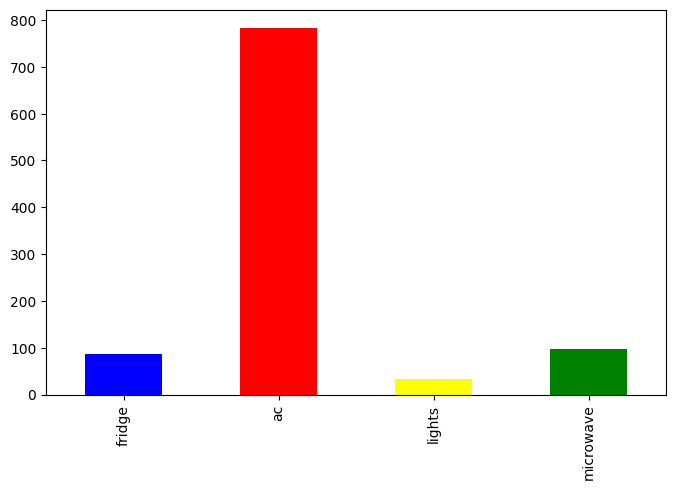

In [13]:
import matplotlib.pyplot as plt

avg_consumption=df_energy[['fridge','ac','lights','microwave']].mean()
avg_consumption
plt.figure(figsize=(8,5))
avg_consumption.plot(kind="bar",color=['blue','red','yellow','green'])
plt.show()

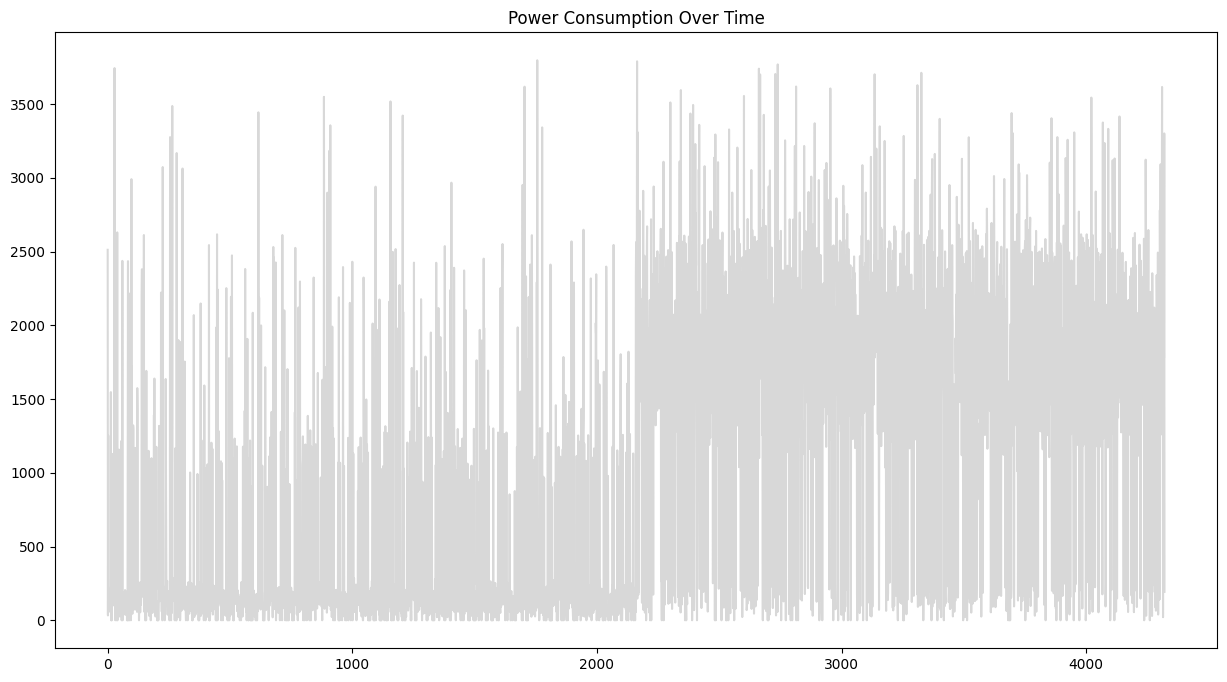

In [15]:
plt.figure(figsize=(15,8))
plt.plot(df_energy.index, df_energy['total_power'], alpha=0.3, color='grey', label="power consumption hourly")
plt.title("Power Consumption Over Time")
plt.show()